In [ ]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sca-programming-school/datasets/main/sales_advertising.csv')

In [ ]:
df.head()

,tv_ads,radio_ads,newspaper_ads,digital_marketing,sales
0,437.086107,227.135984,149.687216,1099.406439,7753.504975
1,955.642876,263.046047,145.524769,1544.144191,11683.762317
2,758.794548,434.546327,112.930487,1212.800205,8910.744929
3,638.792636,203.001974,250.521225,349.944650,3339.284889
4,240.416776,441.342358,157.564771,534.044426,4361.964031


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tv_ads             4985 non-null   float64
 1   radio_ads          4982 non-null   float64
 2   newspaper_ads      4977 non-null   float64
 3   digital_marketing  4974 non-null   float64
 4   sales              4982 non-null   float64
dtypes: float64(5)
memory usage: 195.4 KB


In [ ]:
df.describe()

,tv_ads,radio_ads,newspaper_ads,digital_marketing,sales
count,4985.000000,4982.000000,4977.000000,4974.000000,4982.000000
mean,553.657446,271.148836,165.331063,1114.553668,7758.601336
std,309.177632,128.558088,78.497351,518.141180,2788.705500
min,100.010471,50.023772,30.042591,200.454418,1043.825466
25%,321.262698,161.161510,96.729169,674.282712,5483.593562
50%,550.361031,268.687208,163.928071,1124.985865,7836.046852
75%,774.432493,380.026295,235.335541,1552.196991,9986.817587
max,6735.856228,499.777335,299.947389,1999.864688,14322.724102


### **3. Data Cleaning**

In [ ]:
# handling missing value
df['tv_ads'] = df['tv_ads'].fillna(df['tv_ads'].mean())
df['radio_ads'] = df['radio_ads'].fillna(df['radio_ads'].mean())
df['newspaper_ads'] = df['newspaper_ads'].fillna(df['newspaper_ads'].mean())
df['digital_marketing'] = df['digital_marketing'].fillna(df['digital_marketing'].mean())
df['sales'] = df['sales'].fillna(df['sales'].mean())

# col_name = ['a','b','c','d']
# for i in col_name:
  # df[i] = df[i].fillna(df[i].mean())

In [ ]:
# handling outlier
IQR = df['tv_ads'].quantile(0.75) - df['tv_ads'].quantile(0.25)
lower_bound = df['tv_ads'].quantile(0.25) - (IQR * 1.5)
upper_bound = df['tv_ads'].quantile(0.75) + (IQR * 1.5)
df_new = df[ (df['tv_ads'] >= lower_bound) & (df['tv_ads'] <= upper_bound) ]

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4993 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tv_ads             4993 non-null   float64
 1   radio_ads          4993 non-null   float64
 2   newspaper_ads      4993 non-null   float64
 3   digital_marketing  4993 non-null   float64
 4   sales              4993 non-null   float64
dtypes: float64(5)
memory usage: 234.0 KB


### **4. Correlations**

In [ ]:
corr_matrix = df_new.corr()
corr_matrix

,tv_ads,radio_ads,newspaper_ads,digital_marketing,sales
tv_ads,1.000000,-0.006607,0.001231,0.028083,0.302529
radio_ads,-0.006607,1.000000,-0.007957,-0.001603,0.091468
newspaper_ads,0.001231,-0.007957,1.000000,-0.001148,-0.002389
digital_marketing,0.028083,-0.001603,-0.001148,1.000000,0.934231
sales,0.302529,0.091468,-0.002389,0.934231,1.000000


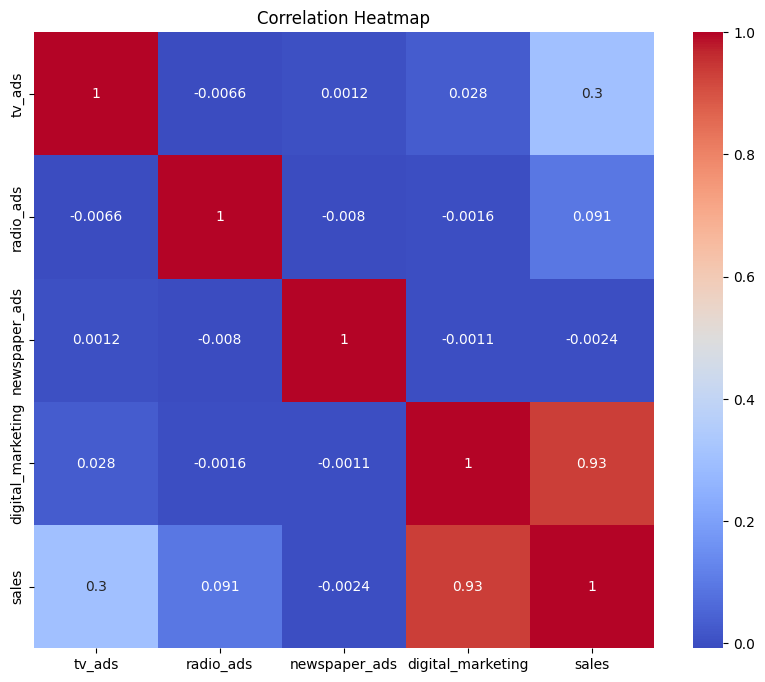

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### **5. Regression**

In [ ]:
x = df_new['digital_marketing']
y = df_new['sales']
x = sm.add_constant(x)
model_1 = sm.OLS(y, x).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                 3.424e+04
Date:                Mon, 09 Feb 2026   Prob (F-statistic):               0.00
Time:                        19:33:56   Log-Likelihood:                -41539.
No. Observations:                4993   AIC:                         8.308e+04
Df Residuals:                    4991   BIC:                         8.310e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2149.9146     33.40

In [ ]:
x2 = df_new['newspaper_ads']
y2 = df_new['sales']
x2 = sm.add_constant(x2)
model_2 = sm.OLS(y2, x2).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.02849
Date:                Mon, 09 Feb 2026   Prob (F-statistic):              0.866
Time:                        19:33:56   Log-Likelihood:                -46687.
No. Observations:                4993   AIC:                         9.338e+04
Df Residuals:                    4991   BIC:                         9.339e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7772.5426     92.048     84.440

### **6. Forecasting**

In [ ]:
# digital marketing forecast
test_digital_budget = pd.DataFrame({'digital_marketing': [0, 1000, 2000, 2500]})
test_digital_budget

,digital_marketing
0,0
1,1000
2,2000
3,2500


In [ ]:
digital_mkt_constant = sm.add_constant(test_digital_budget)
forecast_sale = model_1.predict(digital_mkt_constant)
print(forecast_sale)

0     2149.914642
1     7181.469612
2    12213.024581
3    14728.802066
dtype: float64


In [ ]:
# newspaper ads forecast
test_newspaper_budget = pd.DataFrame({'newspaper_ads': [0, 2000, 2500, 3200, 4000, 4500, 0]})
test_newspaper_budget

,newspaper_ads
0,0
1,2000
2,2500
3,3200
4,4000
5,4500
6,0


In [ ]:
test_newspaper_budget = sm.add_constant(test_newspaper_budget)
forecast_sale_newspaper = model_2.predict(test_newspaper_budget)
print(forecast_sale_newspaper)

0    7772.542603
1    7602.642138
2    7560.167022
3    7500.701859
4    7432.741674
5    7390.266557
6    7772.542603
dtype: float64


###**What if we will stop spending for newspaper ads?**

Upon forecasting sales based on budget spent on newspaper ads, it can be conluded that stopping spending on this channel could have no impact on sales as the sales number can be seen decreasing as the budget increase. This is further explained by the negative very weak correlation between sales and newspaper ads based on the correlation heatmap.

###**What if we will focus on a particular source (conclusion about each ads source)?**

The sales forecast based on the given digital marketing budget suggests that
this channel has a positive strong correlation to sales as the number of budget increases so does sales. This is also further explained by the heatmap.

The same scenario can also be applied for both **tv and radio ads** as they also have postive correlation sales, accounted for 0.3 and 0.091 respectively. However, this relationship does not represent a cause-and-effect relationship, but rather a statistical association observed in the data.

###**What if we will stop ads at all?**

When we decide to stop all the ads spending, sales will decrease tremendously as majority of the channels have positive correlation to sales - as the budget increase so does sales.

However, this does not apply to newspaper ads based on its weak relationship with sales as forecasted above, stopping or reducing spending on newspaper ads is unlikely to to have negative impact on sales performance.